In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [2]:
# STEP 1: Reload MNIST properly
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check that y_train only has digits 0–9
print("MNIST labels:", np.unique(y_train))  # Should show: [0 1 2 3 4 5 6 7 8 9]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MNIST labels: [0 1 2 3 4 5 6 7 8 9]


In [3]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # Normalize
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

In [4]:
print(np.unique(y_train))  # Should print [0, 1, ..., 9]


[0 1 2 3 4 5 6 7 8 9]


In [56]:
import cv2
import os
import numpy as np


output_dir = "symbol_imageSSS"
os.makedirs(output_dir, exist_ok=True)

In [10]:
import cv2
import numpy as np
import os
import random

symbols = ['+', '-', '*', '/']
symbol_map = {'+': 'plus', '-': 'minus', '*': 'star', '/': 'slash'}
fonts = [cv2.FONT_HERSHEY_SIMPLEX, cv2.FONT_HERSHEY_COMPLEX]

output_dir = 'symbol_imageSSS'
os.makedirs(output_dir, exist_ok=True)

for symbol in symbols:
    safe_symbol = symbol_map[symbol]
    for i in range(6000):
        img = np.ones((28, 28), dtype=np.uint8) * 255

        font = random.choice(fonts)
        font_scale = random.uniform(0.7, 1.0)
        thickness = random.choice([1, 2, 3])
        x_offset = random.randint(0, 5)
        y_offset = random.randint(20, 26)

        cv2.putText(img, symbol, (x_offset, y_offset), font, font_scale, (0,), thickness)
        filename = f"{safe_symbol}_{i}.png"
        cv2.imwrite(os.path.join(output_dir, filename), img)




In [57]:
missing = []

for symbol in ['plus', 'minus', 'star', 'slash']:
    for j in range(6000):  # Match the same number of images
        path = f"symbol_imageSSS/{symbol}_{j}.png"
        if not os.path.exists(path):
            missing.append(path)

print(f"Missing: {len(missing)} files")
print(missing[:10])


Missing: 0 files
[]


In [58]:
from tensorflow.keras.utils import to_categorical
from PIL import Image
import numpy as np




symbol_images = []
symbol_labels = []

for i, symbol in enumerate(symbols):
    safe_symbol = symbol_map[symbol]
    for j in range(6000):
        img_path = f"symbol_imageSSS/{safe_symbol}_{j}.png"
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img = np.array(img) / 255.0  # Normalize to [0, 1]
        img = img.reshape(28, 28, 1)  # Add channel dimension
        symbol_images.append(img)
        symbol_labels.append(10 + i)  # 10, 11, 12, 13

symbol_images = np.array(symbol_images)
symbol_labels = np.array(symbol_labels)





In [219]:
symbol_images.shape

(24000, 28, 28, 1)

In [14]:
# Reshape x_train to add channel dimension (from (28, 28) to (28, 28, 1))



# Now combine
x_train_full = np.concatenate((x_train, symbol_images), axis=0)
x_test_full = np.concatenate((x_test, symbol_images), axis=0)

# Combine labels
y_train_full = np.concatenate((y_train, symbol_labels), axis=0)
y_test_full = np.concatenate((y_test, symbol_labels), axis=0)





In [15]:
y_train_full = to_categorical(y_train_full, num_classes=14)
y_test_full=to_categorical(y_test_full, num_classes=14)

In [16]:
print("x_train_full shape:", x_train_full.shape)
print("y_train_full shape:", y_train_full.shape)
print("Unique class labels:", np.unique(np.argmax(y_train_full, axis=1)))



x_train_full shape: (84000, 28, 28, 1)
y_train_full shape: (84000, 14)
Unique class labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [17]:
print(np.unique(y_train))           # Should be [0–9]
print(np.unique(symbol_labels))     # Should be [10–13]


[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13]


In [18]:
from sklearn.utils import shuffle
x_train_full, y_train_full = shuffle(x_train_full, y_train_full, random_state=42)


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [20]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dropout

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),

    layers.Dense(128, activation='relu',),
    layers.Dropout(0.5),
    layers.Dense(14, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train_full, y_train_full, epochs=10, batch_size=64, validation_split=0.1,callbacks=early_stopping)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.8031 - loss: 0.6072 - val_accuracy: 0.9852 - val_loss: 0.0480
Epoch 2/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 76s 64ms/step - accuracy: 0.9737 - loss: 0.0893 - val_accuracy: 0.9896 - val_loss: 0.0313
Epoch 3/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 83s 65ms/step - accuracy: 0.9811 - loss: 0.0621 - val_accuracy: 0.9917 - val_loss: 0.0291
Epoch 4/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 73s 62ms/step - accuracy: 0.9821 - loss: 0.0557 - val_accuracy: 0.9920 - val_loss: 0.0249
Epoch 5/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 83s 63ms/step - accuracy: 0.9849 - loss: 0.0482 - val_accuracy: 0.9923 - val_loss: 0.0245
Epoch 6/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 76s 64ms/step - accuracy: 0.9863 - loss: 0.0460 - val_accuracy: 0.9924 - val_loss: 0.0251
Epoch 7/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.9892 - loss: 0.0349 - val_accuracy: 0.9940 - val_loss: 0.0219
Epoch 8/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 73s 62ms/step - accuracy: 0.9892 -

In [54]:
model.save("digit_symbol_classifier.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


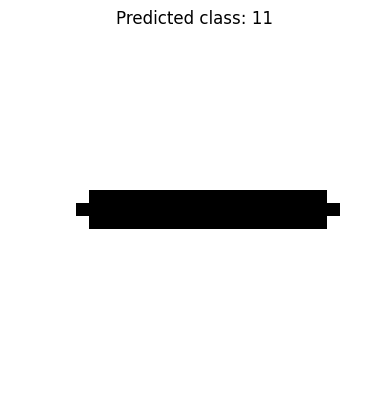

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Pick a random image from the combined set
#i = np.random.randint(0, len(x_train_full))
i = np.random.randint(0, len(x_test_full))
sample = x_test_full[i]
#sample = x_train_full[i]
#sample=x_test[200]


# Predict
pred = model.predict(sample.reshape(1, 28, 28, 1))
predicted_class = np.argmax(pred)

# Show image + prediction
plt.imshow(sample.squeeze(), cmap='gray')
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test_full)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_full = y_test_full.astype(int)

print(classification_report(y_test_full, y_pred_classes))


1063/1063 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00         0
          10       0.46      1.00      0.63      6000
          11       1.00      1.00      1.00      6000
          12       0.40      1.00      0.57      6000
          13       0.00      0.00      0.00      6000

    accuracy                           0.53     34000
   macro avg       0.31      0.50      0.37     34000
weighted avg       0.33      0.53      0.39     34000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [120]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


2625/2625 - 24s - 9ms/step - accuracy: 0.9972 - loss: 0.0092


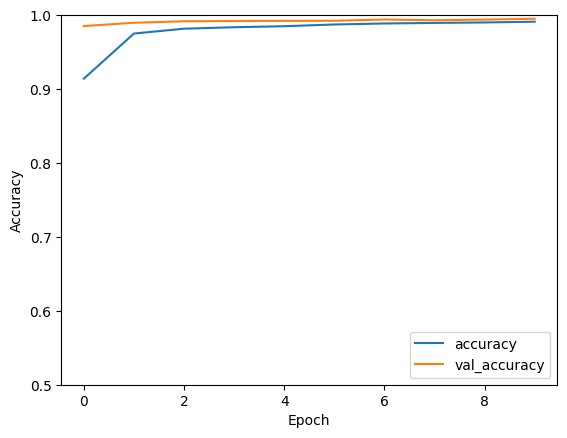

In [47]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_train_full,  y_train_full, verbose=2)

In [ ]:
from google.colab import files
files.download("digit_symbol_classifier.keras")

#From here, i tried to build a model that can calculate arithmetic operation by detecting nos

But the model has some errors in data segmentation and identification here. hence the final result isn’t perfect.

**THE ORIGINAL NUMBER AND OPERATOR IDENTIFIER MODEL CODE ENDS HERE**
--------------------------------------------------

In [51]:
import cv2
import numpy as np
import os

# Increased width per character to avoid overlap
char_width = 40
img = np.ones((28, char_width * 3), dtype=np.uint8) * 255

expr = "0+5"

for i, ch in enumerate(expr):
    cv2.putText(
        img,
        ch,
        (i * char_width + 5, 24),  # Increased spacing
        cv2.FONT_HERSHEY_SIMPLEX,
        1.0,
        (0,),
        2
    )

os.makedirs("test_images", exist_ok=True)
cv2.imwrite("test_images/expr_00+5.png", img)



True

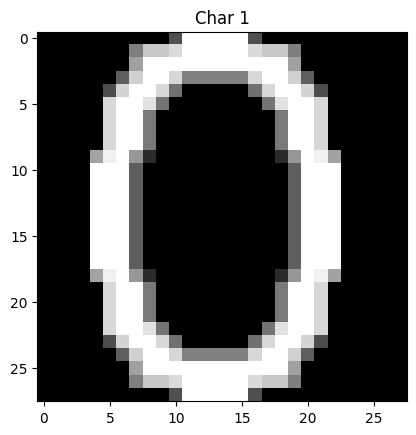

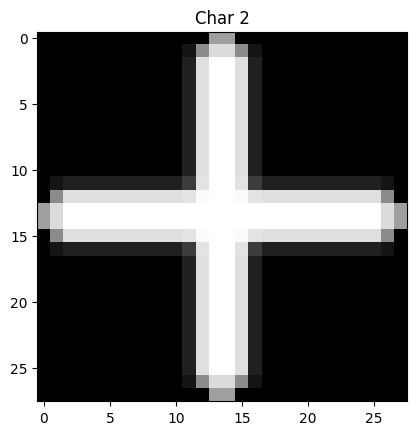

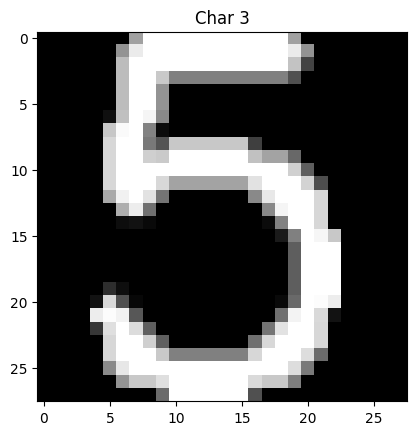

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Char 1 prediction vector: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Top label: 0 | Confidence: 1.00
Char 2 prediction vector: [0.   0.02 0.   0.   0.98 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
Top label: 4 | Confidence: 0.98
Char 3 prediction vector: [0.   0.   0.   0.   0.   0.89 0.   0.11 0.   0.   0.   0.   0.   0.  ]
Top label: 5 | Confidence: 0.89
Decoded characters: ['0', '4', '5']
Expression: 045
Result: Invalid expression


In [52]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread("test_images/expr_00+5.png", cv2.IMREAD_GRAYSCALE)

# Threshold to binary
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get bounding boxes, filter out small ones
boxes = [cv2.boundingRect(c) for c in contours if cv2.contourArea(c) > 50]

# Sort boxes left-to-right
boxes = sorted(boxes, key=lambda b: b[0])

# Resize with padding
def resize_with_padding(image, size=28):
    h, w = image.shape
    scale = size / max(h, w)
    new_w, new_h = int(w * scale), int(h * scale)
    resized = cv2.resize(image, (new_w, new_h))

    top = (size - new_h) // 2
    bottom = size - new_h - top
    left = (size - new_w) // 2
    right = size - new_w - left

    padded = cv2.copyMakeBorder(resized, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)
    return padded

# Extract and preprocess characters
chars = []
for x, y, w, h in boxes:
    roi = thresh[y:y+h, x:x+w]
    roi = resize_with_padding(roi)
    roi = roi.astype('float32') / 255.0
    roi = roi.reshape(1, 28, 28, 1)
    chars.append(roi)

# Optional: visualize
for i, roi in enumerate(chars):
    plt.imshow(roi.reshape(28, 28), cmap='gray')
    plt.title(f"Char {i+1}")
    plt.show()

# Load model
model = load_model("digit_symbol_classifier.keras")

# Predict all characters
char_imgs = np.vstack(chars)
preds = model.predict(char_imgs)

# Decode predictions
def decode(p):
    if p < 10:
        return str(p)
    return ['+', '-', '*', '/'][p - 10]

for i, p in enumerate(preds):
    print(f"Char {i+1} prediction vector:", np.round(p, 2))
    print(f"Top label: {np.argmax(p)} | Confidence: {np.max(p):.2f}")

decoded = [decode(np.argmax(p)) for p in preds]
print("Decoded characters:", decoded)

# Evaluate expression
if len(decoded) == 3 and decoded[0].isdigit() and decoded[2].isdigit() and decoded[1] in '+-*/':
    expr = ''.join(decoded)
    try:
        result = eval(expr)
    except Exception as e:
        result = f"Error: {e}"
else:
    expr = ''.join(decoded)
    result = "Invalid expression"

print(f"Expression: {expr}")
print(f"Result: {result}")




In [ ]:
print("Decoded characters:", decoded)

Decoded characters: ['3', '4', '5']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>